In [85]:
import json_helper

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json

In [86]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)["results"]
    return data

def read_all_json_files(JSON_ROOT):
    all_records = []
    for item_name in os.listdir(JSON_ROOT):
        item_path = os.path.join(JSON_ROOT, item_name)
        if os.path.isfile(item_path) and item_name.endswith(".json"):
            with open(item_path, 'r', encoding='utf-8') as f:
                subdata = read_json(item_path)
                for obj in subdata:
                    obj["source_file"] = item_name  # Track the source file
                    all_records.append(obj)

    return pd.DataFrame(all_records)

df = read_all_json_files('./data/daily_summaries')

In [87]:
# display a summary of df_daily_summaries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1386 non-null   object
 1   datatype     1386 non-null   object
 2   station      1386 non-null   object
 3   attributes   1386 non-null   object
 4   value        1386 non-null   int64 
 5   source_file  1386 non-null   object
dtypes: int64(1), object(5)
memory usage: 65.1+ KB


How many stations are there in total for FIPS10003

In [88]:
#
print(df["station"].nunique())

17


In [89]:
print(df.dtypes)

date           object
datatype       object
station        object
attributes     object
value           int64
source_file    object
dtype: object


Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [90]:
# 
temps_max=df[df["datatype"]=="TMAX"]

In [91]:
temps_max

,date,datatype,station,attributes,value,source_file
33,2018-01-23T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",172,daily_summaries_FIPS10003_jan_2018_1.json
76,2018-01-24T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",72,daily_summaries_FIPS10003_jan_2018_1.json
119,2018-01-25T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",28,daily_summaries_FIPS10003_jan_2018_1.json
163,2018-01-26T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",39,daily_summaries_FIPS10003_jan_2018_1.json
206,2018-01-27T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",150,daily_summaries_FIPS10003_jan_2018_1.json
242,2018-01-28T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",133,daily_summaries_FIPS10003_jan_2018_1.json
291,2018-01-29T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",78,daily_summaries_FIPS10003_jan_2018_1.json
334,2018-01-30T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",39,daily_summaries_FIPS10003_jan_2018_1.json
380,2018-01-31T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",6,daily_summaries_FIPS10003_jan_2018_1.json
428,2018-01-01T00:00:00,TMAX,GHCND:USW00013781,",,W,2400",-60,daily_summaries_FIPS10003_jan_2018_0.json


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [92]:
# 
print(len(temps_max))
print(temps_max["value"].max())
print(temps_max["value"].min())
print(temps_max["value"].mean())

31
172
-88
48.193548387096776


Let's graph this DataFrame so we can get a visual representation for this information.

In [93]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [94]:
%matplotlib inline

In [95]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

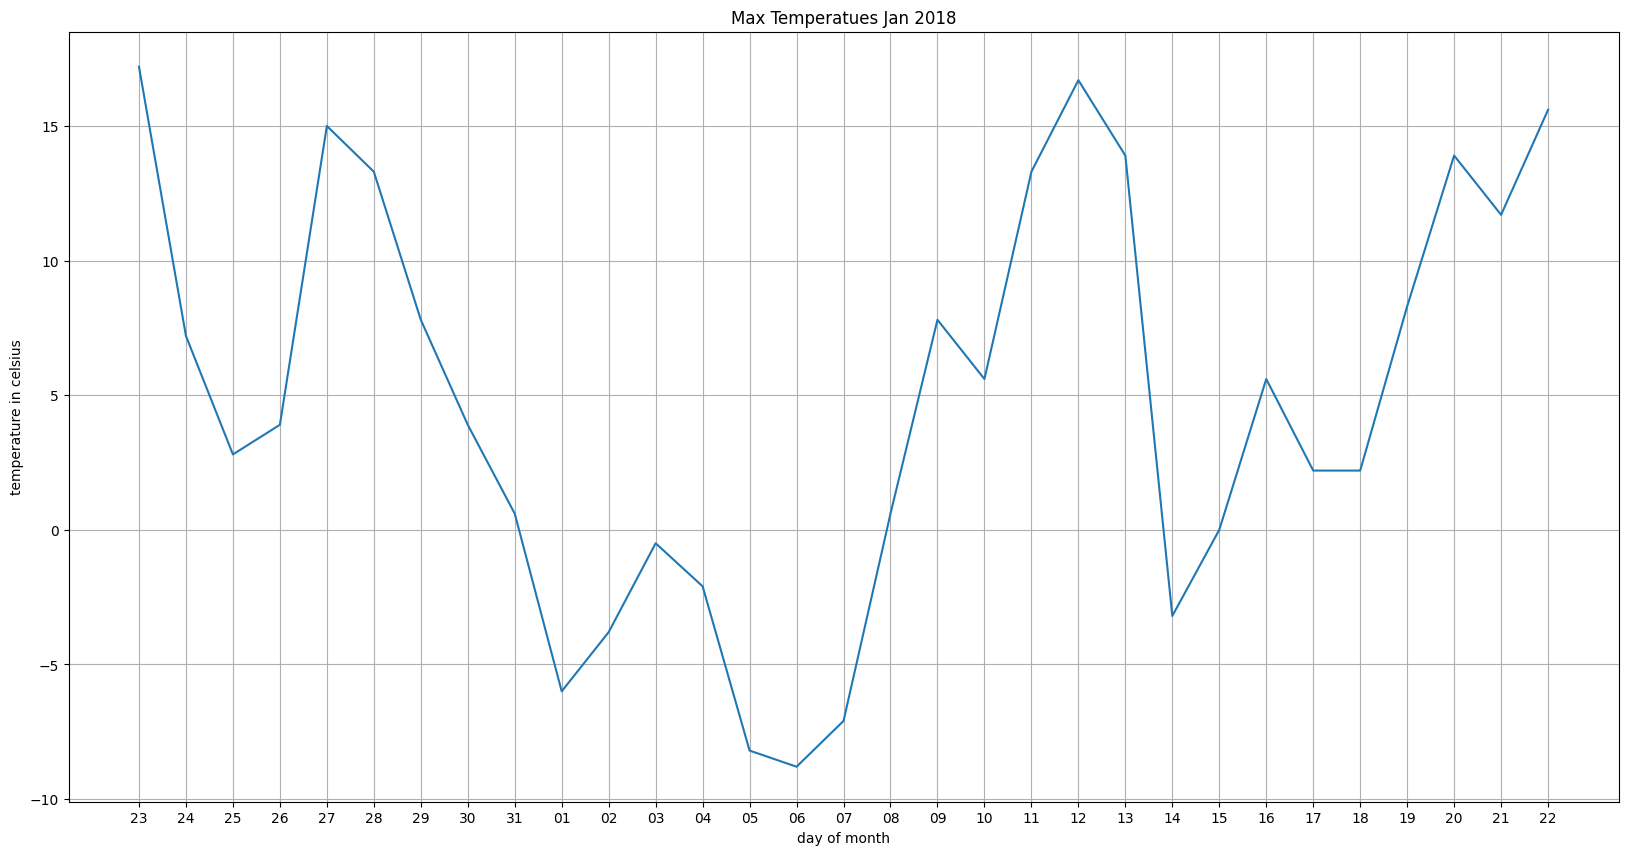

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [97]:
# 
temps_min=df[df["datatype"]=="TMIN"]

In [98]:
temps_min

,date,datatype,station,attributes,value,source_file
34,2018-01-23T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",44,daily_summaries_FIPS10003_jan_2018_1.json
77,2018-01-24T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",6,daily_summaries_FIPS10003_jan_2018_1.json
120,2018-01-25T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-38,daily_summaries_FIPS10003_jan_2018_1.json
164,2018-01-26T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-66,daily_summaries_FIPS10003_jan_2018_1.json
207,2018-01-27T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-49,daily_summaries_FIPS10003_jan_2018_1.json
243,2018-01-28T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",72,daily_summaries_FIPS10003_jan_2018_1.json
292,2018-01-29T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",33,daily_summaries_FIPS10003_jan_2018_1.json
335,2018-01-30T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-55,daily_summaries_FIPS10003_jan_2018_1.json
381,2018-01-31T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-93,daily_summaries_FIPS10003_jan_2018_1.json
429,2018-01-01T00:00:00,TMIN,GHCND:USW00013781,",,W,2400",-149,daily_summaries_FIPS10003_jan_2018_0.json


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [99]:
# 
print(len(temps_min))
print(temps_min["value"].max())
print(temps_min["value"].min())
print(temps_min["value"].mean())

31
83
-166
-55.225806451612904


Graph the temps_min DataFrame

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

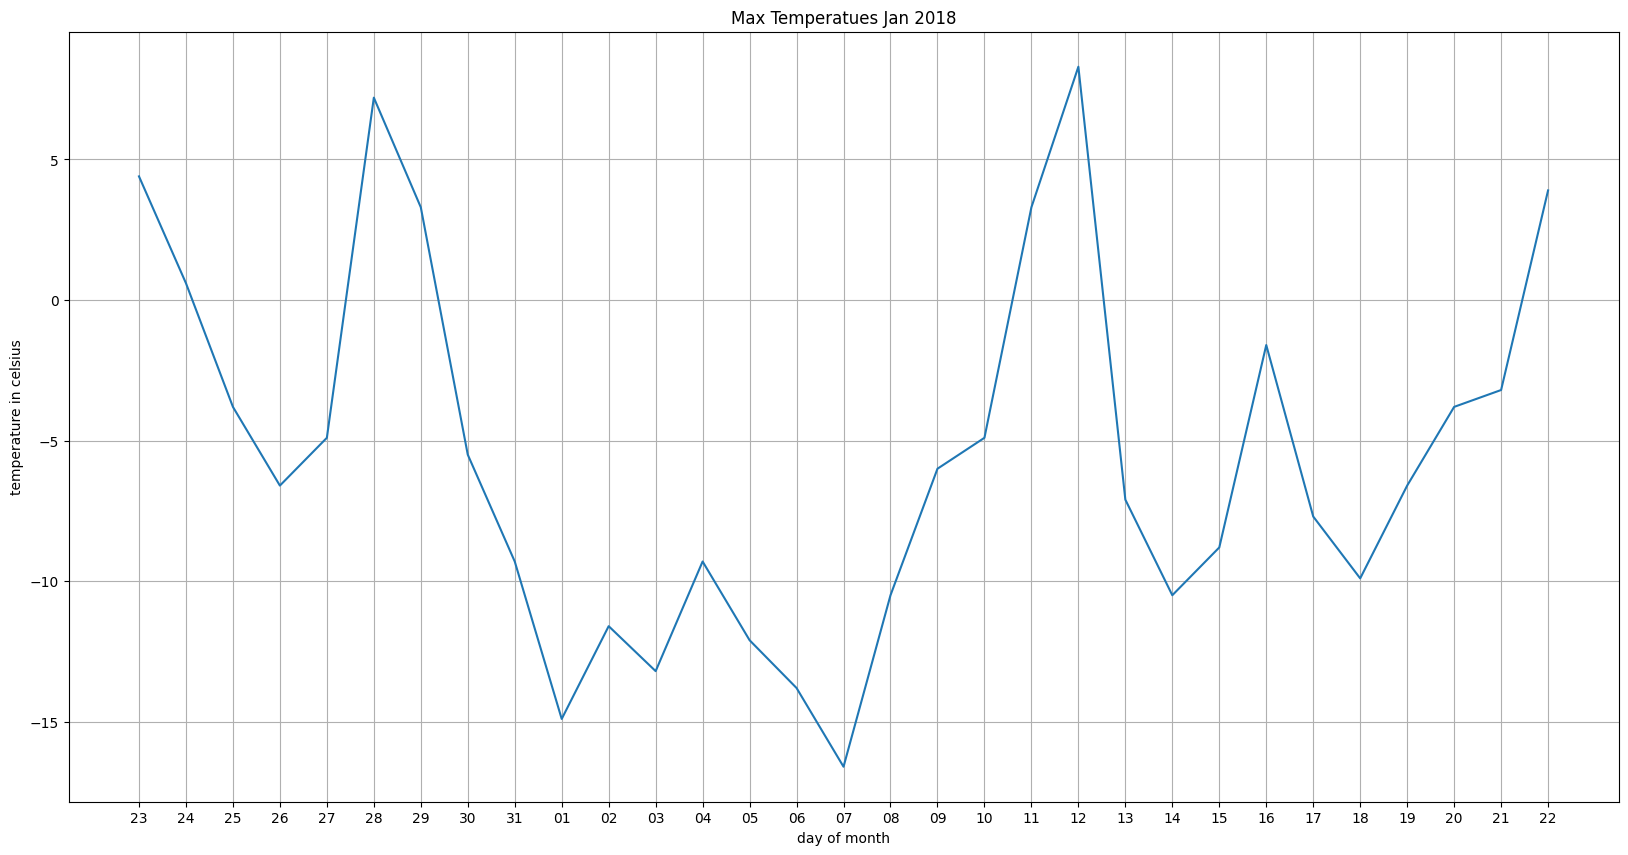

In [100]:
# 
x = temps_min['date'].str[8:10]
y = temps_min['value'] / 10

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

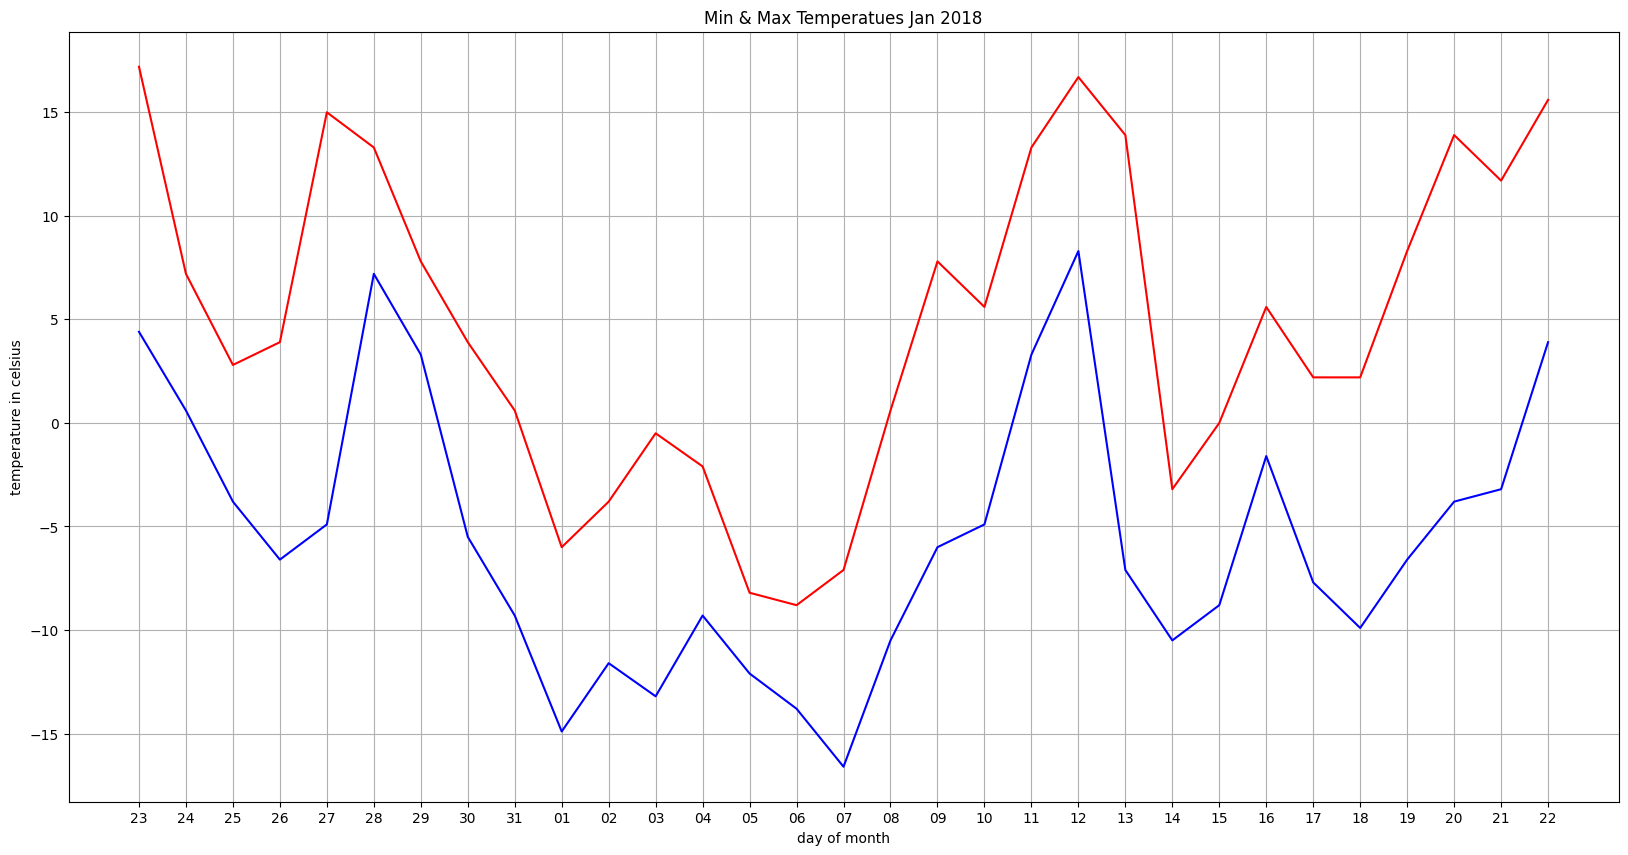

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')